<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/market_Segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Amey Patil
### 1132212250

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [459]:
X = pd.read_csv('/content/Train.csv')
y = pd.read_csv('/content/Test.csv')

In [460]:
df = pd.concat([X,y],axis=0)

In [461]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [462]:
print(df.shape)

(10695, 11)


## Preprocessing

In [463]:
df = df.drop(columns='ID',axis=1)

In [464]:
X = df

In [465]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10695 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
 9   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 919.1+ KB


# **Categorical Variables**


1.   Gender
2.   Ever_Married
3.   Graduated
4.   Profession
5.   Spending_Score
6.   Var_1
7.   Segmentation

# **Numerical Variables**


1.   Age
2.   Work_Experience
3.   Family_Size 








In [466]:
X['Gender'] = X['Gender'].astype('category')
X['Ever_Married'] = X['Ever_Married'].astype('category')
X['Graduated'] = X['Graduated'].astype('category')
X['Profession'] = X['Profession'].astype('category')
X['Spending_Score'] = X['Spending_Score'].astype('category')
X['Spending_Score'] = X['Spending_Score'].astype('category')
X['Var_1'] = X['Var_1'].astype('category')
X['Segmentation'] = X['Segmentation'].astype('category')

In [467]:
X.describe()

,Age,Work_Experience,Family_Size
count,10695.000000,9597.000000,10247.000000
mean,43.511828,2.619777,2.844052
std,16.774158,3.390790,1.536427
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


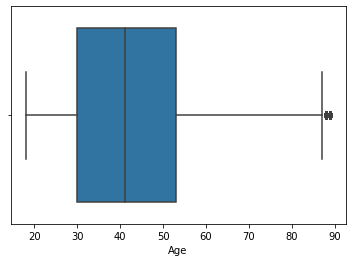

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


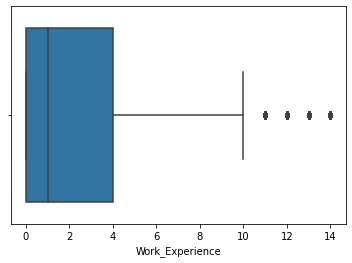

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


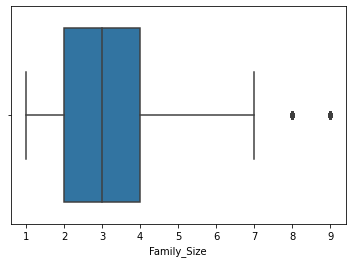

In [468]:
for i in ['Age','Work_Experience','Family_Size']:
  plt.figure()
  sns.boxplot(X[i])
  plt.show()

## Outlier Detection

In [469]:
# IQR
'''for i in ['Work_Experience','Age','Family_Size']:  
    Q1 = np.percentile(X[i], 25)

    Q3 = np.percentile(X[i], 75)
    IQR = Q3 - Q1

    print("For "+i)
    print()
    print("Old Shape: ", X.shape)

    # Upper bound
    upper = np.where(X[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(X[i] <= (Q1-1.5*IQR))

    ''' 'Removing the Outliers' '''
    X.drop(upper[0], inplace = True,axis=0)
    X.drop(lower[0], inplace = True,axis=0)

    print("New Shape: ", X.shape)'''


'for i in [\'Work_Experience\',\'Age\',\'Family_Size\']:  \n    Q1 = np.percentile(X[i], 25)\n\n    Q3 = np.percentile(X[i], 75)\n    IQR = Q3 - Q1\n\n    print("For "+i)\n    print()\n    print("Old Shape: ", X.shape)\n\n    # Upper bound\n    upper = np.where(X[i] >= (Q3+1.5*IQR))\n    # Lower bound\n    lower = np.where(X[i] <= (Q1-1.5*IQR))\n\n    Removing the Outliers\n    X.drop(upper[0], inplace = True,axis=0)\n    X.drop(lower[0], inplace = True,axis=0)\n\n    print("New Shape: ", X.shape)'

## Missing Values

In [470]:
X.isna().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [471]:
print(X.shape)
X = X[X.isnull().sum(axis=1) < 2]
print(X.shape)

(10695, 10)
(10489, 10)


In [472]:
X.isna().sum()

Gender               0
Ever_Married       143
Age                  0
Graduated           71
Profession         113
Work_Experience    941
Spending_Score       0
Family_Size        325
Var_1               77
Segmentation         0
dtype: int64

Ever_Married, Graduated, Profession, Work_Experience, Family_Size, Var_1 have missing values

In [473]:
# Filling Median values in numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
X['Work_Experience'] = imputer.fit_transform(X[['Work_Experience']])
X['Family_Size'] = imputer.fit_transform(X[['Family_Size']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [474]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', missing_values=np.nan)
X['Var_1'] = imputer.fit_transform(X[['Var_1']])
X['Ever_Married'] = imputer.fit_transform(X[['Ever_Married']])
X['Graduated'] = imputer.fit_transform(X[['Graduated']])
X['Profession'] = imputer.fit_transform(X[['Profession']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [475]:
X.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [476]:
X.describe()

,Age,Work_Experience,Family_Size
count,10489.000000,10489.000000,10489.000000
mean,43.510344,2.470398,2.849557
std,16.725202,3.266586,1.512931
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [477]:
X.sample(5)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
1567,Male,Yes,30,No,Homemaker,1.0,Average,3.0,Cat_6,D
841,Female,No,43,Yes,Doctor,3.0,Low,1.0,Cat_2,A
5207,Male,Yes,55,Yes,Executive,2.0,High,3.0,Cat_6,C
4031,Female,Yes,37,Yes,Artist,7.0,Average,2.0,Cat_2,C
5829,Female,Yes,51,No,Engineer,7.0,Average,5.0,Cat_4,B


In [478]:
X.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# EDA

In [479]:
result = pd.pivot_table(data=X, index=['Profession'],columns=['Gender'], values=['Family_Size'] ,aggfunc="count")
result
#sns.heatmap(result,annot=True)

Family_Size      
Gender             Female  Male
Profession                     
Artist               1598  1692
Doctor                413   505
Engineer              739   190
Entertainment         336   890
Executive              38   720
Healthcare            704  1016
Homemaker             264    56
Lawyer                411   413
Marketing             214   177
missing_value          43    70

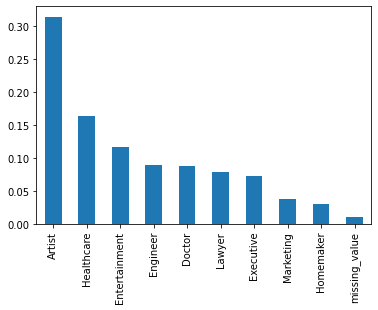

In [480]:
X.Profession.value_counts(normalize=True).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


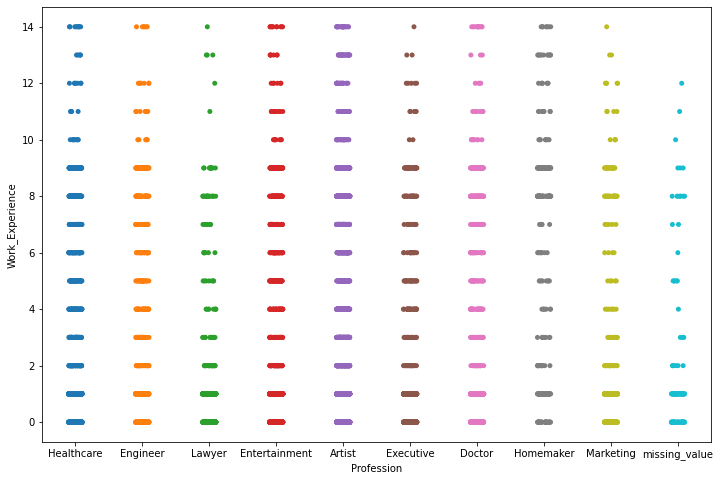

In [481]:
plt.figure(figsize=(12,8))
sns.stripplot(X['Profession'],X['Work_Experience'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


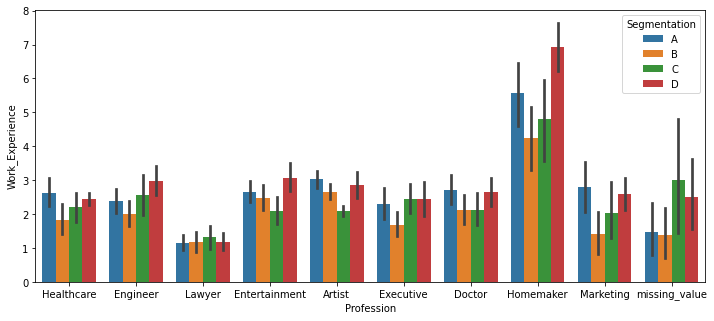

In [482]:
plt.figure(figsize=(12,5))
sns.barplot(X['Profession'],X['Work_Experience'],hue=X['Segmentation'])

As age increases the family size decreases

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


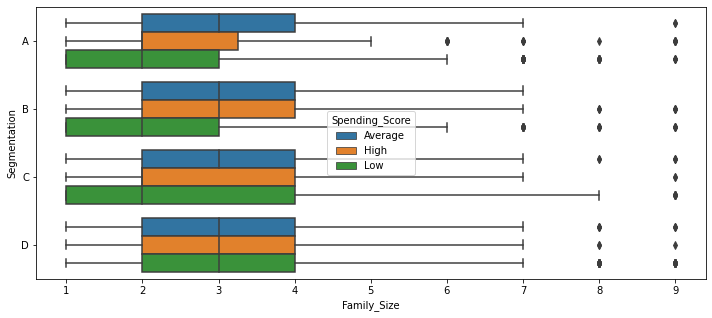

In [483]:
plt.figure(figsize=(12,5))
sns.boxplot(X['Family_Size'],X['Segmentation'],hue=X['Spending_Score'])

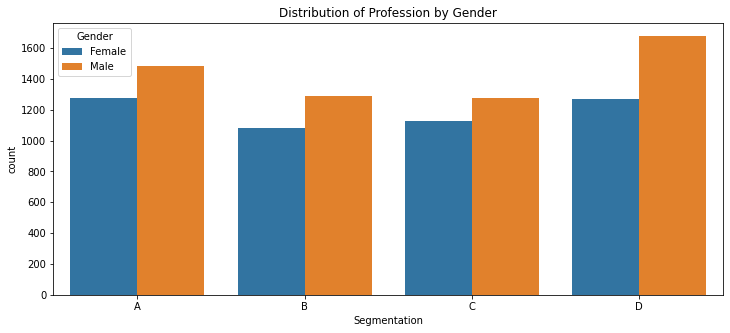

In [484]:
plt.figure(figsize=(12,5))
sns.countplot(x="Segmentation",hue="Gender",data=X);
plt.title('Distribution of Profession by Gender');

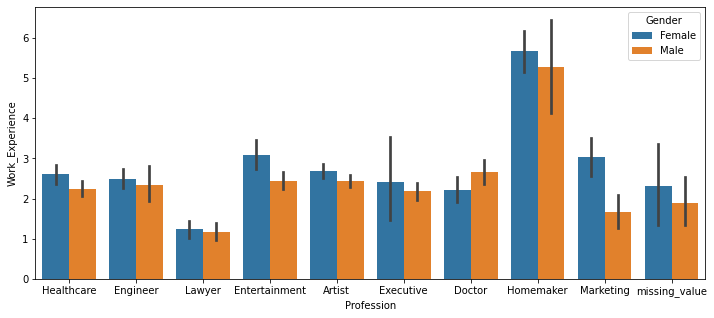

In [485]:
plt.figure(figsize=(12,5))
sns.barplot(x=X['Profession'],y=X['Work_Experience'], hue = X['Gender'])
plt.show()

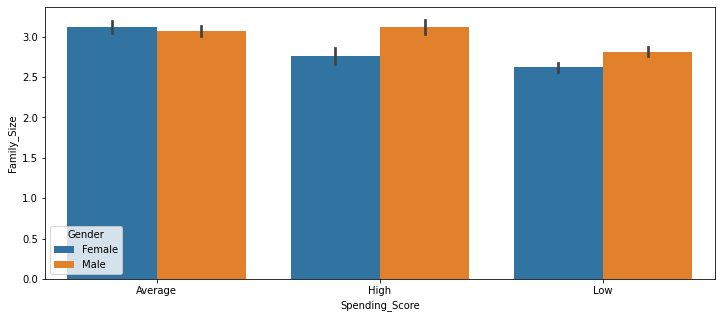

In [486]:
plt.figure(figsize=(12,5))
sns.barplot(x=X['Spending_Score'],y=X['Family_Size'],hue=X['Gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


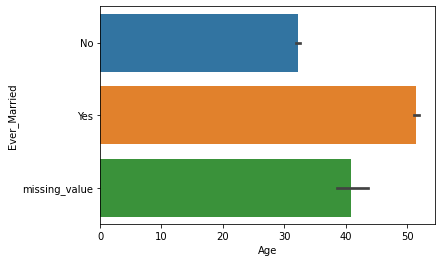

In [487]:
sns.barplot(X['Age'],X['Ever_Married'])

In [488]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


In [489]:
X['Graduated'].value_counts()

Yes              6490
No               3928
missing_value      71
Name: Graduated, dtype: int64

### Converting Categorical to Numerical

In [490]:
X['Spending_Score'].replace(X['Spending_Score'].unique(),[0, 1, 2], inplace=True)
X['Gender'].replace(X['Gender'].unique(),[0, 1], inplace=True)
X['Ever_Married'].replace(X['Ever_Married'].unique(),[0, 1, 2], inplace=True)
X['Graduated'].replace(X['Graduated'].unique(),[0, 1, 2], inplace=True)
X['Profession'].replace(X['Profession'].unique(),[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace=True)
X['Var_1'].replace(X['Var_1'].unique(),[0, 1, 2, 3, 4, 5, 6, 7], inplace=True)
X['Segmentation'].replace(X['Segmentation'].unique(),[0, 1, 2, 3], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [491]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,0,1.0,0,4.0,0,0
1,1,1,38,1,1,1.0,1,3.0,0,1
2,1,1,67,1,1,1.0,0,1.0,1,2
3,0,1,67,1,2,0.0,2,2.0,1,2
4,1,1,40,1,3,1.0,2,6.0,1,1


In [492]:
X.shape

(10489, 10)

## Applying Scaling to change values into (0-1) range

In [493]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,0,1.0,0,4.0,0,0
1,1,1,38,1,1,1.0,1,3.0,0,1
2,1,1,67,1,1,1.0,0,1.0,1,2
3,0,1,67,1,2,0.0,2,2.0,1,2
4,1,1,40,1,3,1.0,2,6.0,1,1


In [494]:
df = X

In [495]:
X = df.iloc[:,:9]
y = df['Segmentation']

In [496]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [497]:
y_train.head()

2874    1
1138    0
5786    2
1436    1
1421    0
Name: Segmentation, dtype: int64

In [498]:
X_train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2874,1,1,39,1,1,1.0,0,1.0,3
1138,0,1,41,0,5,5.0,2,3.0,0
5786,0,0,25,1,3,1.0,0,2.0,3
1436,1,0,32,1,0,0.0,0,3.0,0
1421,0,1,27,1,4,9.0,1,2.0,1


In [499]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [500]:
'''new_df = pd.DataFrame(X_kbest_features)'''

'new_df = pd.DataFrame(X_kbest_features)'

In [501]:
'''new_df.head()'''

'new_df.head()'

In [502]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [503]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [504]:
X_train.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.5,0.295775,0.5,0.111111,0.071429,0.0,0.000,0.428571
1,0.0,0.5,0.323944,0.0,0.555556,0.357143,1.0,0.250,0.000000
2,0.0,0.0,0.098592,0.5,0.333333,0.071429,0.0,0.125,0.428571
3,1.0,0.0,0.197183,0.5,0.000000,0.000000,0.0,0.250,0.000000
4,0.0,0.5,0.126761,0.5,0.444444,0.642857,0.5,0.125,0.142857


## Model Building 

In [505]:
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,0,1.0,0,4.0,0
1,1,1,38,1,1,1.0,1,3.0,0
2,1,1,67,1,1,1.0,0,1.0,1
3,0,1,67,1,2,0.0,2,2.0,1
4,1,1,40,1,3,1.0,2,6.0,1


In [506]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from sklearn.preprocessing import StandardScaler

In [507]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [508]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


In [509]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[100])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [510]:
grid_result = grid.fit(X_train, y_train)

In [511]:
[grid_result.best_score_,grid_result.best_params_]

[0.31629183888435364,
 {'activation': 'relu', 'batch_size': 128, 'epochs': 100, 'layers': [40, 20]}]

In [512]:
pred_y = grid.predict(X_test)

In [513]:
X_train.shape

(8391, 9)

In [514]:
model=Sequential()
model.add(Dense(9,input_dim=9,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [515]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [516]:
model.fit(X_train,y_train,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
66/66 [==============================] - 1s 3ms/step - loss: 0.6785 - accuracy: 0.3307
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6485 - accuracy: 0.3687
Epoch 3/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6381 - accuracy: 0.3817
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.3851
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6272 - accuracy: 0.3940
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6265 - accuracy: 0.3929
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6221 - accuracy: 0.3958
Epoch 8/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6208 - accuracy: 0.3979
Epoch 9/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6186 - accuracy: 0.3994
Epoch 10/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.4014
Epoch 11/